# Lab 1-2: Part 1

## ArcPy

In [1]:
### 1

# Import libraries

import arcpy
import os

# Get CWD

cwd = os.getcwd()

# Create GeoDataBase

arcpy.management.CreateFileGDB(os.getcwd(), 'example_gdb')

# Make it workspace

arcpy.env.workspace = os.path.join(cwd, 'example_gdb.gdb')

In [2]:
### 2

# Create Feature Classes

# Points 

arcpy.management.CreateFeatureclass(os.path.join(cwd, 'example_gdb.gdb'), 'example_point', spatial_reference=26915, geometry_type = 'POINT')

# Lines

arcpy.management.CreateFeatureclass(os.path.join(cwd, 'example_gdb.gdb'), 'example_polyline', spatial_reference=26915, geometry_type = 'POLYLINE')

# Polygons

arcpy.management.CreateFeatureclass(os.path.join(cwd, 'example_gdb.gdb'), 'example_poly', spatial_reference=26915)

<Result 'C:\\Users\\HAL\\Documents\\GIS5572\\Lab01\\example_gdb.gdb\\example_poly'>

In [3]:
### 3

# Create Shapes

# Points

pt1 = arcpy.Point(479025.028, 4979084.696) # Create Point
pt1_geom = arcpy.PointGeometry(pt1, spatial_reference=26915) # Point Geometry

pt2 = arcpy.Point(475025.028, 4974084.696) # Create Point
pt2_geom = arcpy.PointGeometry(pt2, spatial_reference=26915) # Point Geometry

# Line

line_array = arcpy.Array([pt1, pt2])
polyline = arcpy.Polyline(line_array, spatial_reference=26915)

# Polygon

# Import GeoJson into arcpy.Polygon

arcpy.conversion.JSONToFeatures(os.path.join(cwd, 'mpls_boundary.geojson'), 'mpls_boundary') # Import to feature class

# Access new feature class

# https://pro.arcgis.com/en/pro-app/latest/arcpy/get-started/data-access-using-cursors.htm
# https://pro.arcgis.com/en/pro-app/latest/arcpy/get-started/reading-geometries.htm

polys = [] # Create list to catch polygons
cursor = arcpy.da.SearchCursor('mpls_boundary', ['SHAPE@']) # Set cursor as shape search in mpls_boundary
for row in cursor:
    polys += [row[0]]   # Acquire shapes
    
# Get Polygon
    
poly = polys[0] # Only one in this example

arcpy.management.Delete('mpls_boundary') # Delete boundary feature class    

<Result 'true'>

In [4]:
### 4

# Add to feature class

# Point

shapes = [pt1_geom]

with arcpy.da.InsertCursor('example_point', ['SHAPE@']) as cursor:
    for shape in shapes:
        cursor.insertRow([shape])

# Line

shapes = [polyline]

with arcpy.da.InsertCursor('example_polyline', ['SHAPE@']) as cursor:
    for shape in shapes:
        cursor.insertRow([shape])

# Polygon

shapes = [poly]

with arcpy.da.InsertCursor('example_poly', ['SHAPE@']) as cursor:
    for shape in shapes:
        cursor.insertRow([shape])

In [5]:
### 5

# View each row of a feature class

arcpy.conversion.JSONToFeatures(os.path.join(cwd, 'mpls_boundary.geojson'), 'mpls_boundary') # Import Geojson to feature class

# Summarize/get fields
fields = [f.name for f in arcpy.ListFields('mpls_boundary')]
print(fields)

# Iterate through rows
cursor = arcpy.da.SearchCursor('mpls_boundary', fields) # Set cursor as shape search in mpls_boundary
for row in cursor:
    print(row)   # Show row
    
arcpy.management.Delete('mpls_boundary') # Delete boundary feature class      

['OBJECTID', 'Shape', 'CTU_ID', 'CTU_NAME', 'CTU_CODE', 'Shape_Length', 'Shape_Area']
(1, (478877.06757128355, 4978942.531882315), 2395345.0, 'Minneapolis', '43000', 61669.553757925605, 148624867.55136013)


<Result 'true'>

In [6]:
### 6

# Export

# Shapefile

os.mkdir('shp')
arcpy.conversion.FeatureClassToShapefile('example_point', os.path.join(cwd, 'shp'))

# GeoDataBase

arcpy.conversion.FeatureClassToGeodatabase('example_point', os.path.join(cwd, 'example_gdb.gdb'))

# WKT

# Open file in write mode
with open(r'shapes_wkt.txt', 'w') as file:
    for shape in [pt1_geom, polyline, poly]:
        wkt = shape.WKT
        # write each wkt on new line
        file.write("%s\n" % wkt)
        
# GeoJSON

arcpy.conversion.FeaturesToJSON('example_point', os.path.join(cwd, 'example_point.geojson'), geoJSON = True)

<Result 'C:\\Users\\HAL\\Documents\\GIS5572\\Lab01\\example_point.geojson'>

In [7]:
### 7

# Import from wkt

# Open shapes_wkt.txt
with open(r'shapes_wkt.txt', 'r') as file:
    loaded_wkts = file.readlines()
    
wkts=[]
# Remove new line characters
for loaded_wkt in loaded_wkts:
    wkts += [loaded_wkt[:-2]]
                 
wkts

['POINT (479025.02799999999 4979084.6960000005',
 'MULTILINESTRING ((479025.02799999999 4979084.6960000005, 475025.02799999999 4974084.6960000005)',
 'MULTIPOLYGON Z (((474025.02780000027 4974084.6956999991 0, 474026.81520000007 4973286.3438000008 0, 474027.36409999989 4972484.2321000006 0, 474829.96729999967 4972473.0042000003 0, 474827.12650000025 4971668.7555999998 0, 474823.79800000042 4970870.5369000006 0, 475925.19859999977 4970855.0585999992 0, 476683.10240000021 4970844.4085000008 0, 477230.17980000004 4970836.7248999998 0, 478039.2703999998 4970839.7566999998 0, 478286.21030000038 4970841.4076000005 0, 478849.89460000023 4970845.1762000006 0, 480189.29530000035 4970840.7016000003 0, 480190.58789999969 4970849.8049999997 0, 480078.14599999972 4970850.3302999996 0, 480038.99600000028 4970850.4730999991 0, 480045.18039999995 4971051.4532999992 0, 479944.37959999964 4971051.7886999995 0, 479948.04629999958 4971243.4615000002 0, 479889.87160000019 4971243.3337999992 0, 479891.37069

In [ ]:
### 8

# Delete example feature classes

# arcpy.management.Delete('example_point') # Delete feature class
# arcpy.management.Delete('example_polyline') # Delete feature class
# arcpy.management.Delete('example_polygon') # Delete feature class

## FionaShapely

In [1]:
### 1

# Import libraries

import numpy as np # Creating data
import shapely as shp # Creating shapes
import geopandas as gpd # Spatial Data Management

In [2]:
### 2

# Create data

# Fields

columns = ['col1', 'col2']

col1_vals = np.array([1,2,3])
col2_vals = np.array([1,2,3])

data = np.array([col1_vals,col2_vals]).T

# Geometry

pt = shp.geometry.Point(475025.028, 4974084.696) # Point
line = shp.geometry.LineString([(479025.028, 4979084.696),
                                (475025.028, 4974084.696)]) # Line
polygon = gpd.read_file('mpls_boundary.geojson').geometry[0] # Polygon, Importing GeoJson from file

shapes = gpd.GeoSeries([pt, line, polygon],
                      crs = 'EPSG:26915')

In [3]:
### 3

# Create Feature Class (GeoDataFrame)

gdf = gpd.GeoDataFrame(data,
                       columns = columns, 
                       geometry = shapes)

In [4]:
### 4

# Show rows of data

gdf.head()

,col1,col2,geometry
0,1,1,POINT (475025.028 4974084.696)
1,2,2,"LINESTRING (479025.028 4979084.696, 475025.028..."
2,3,3,"POLYGON ((474025.028 4974084.696, 474030.014 4..."


<AxesSubplot: >

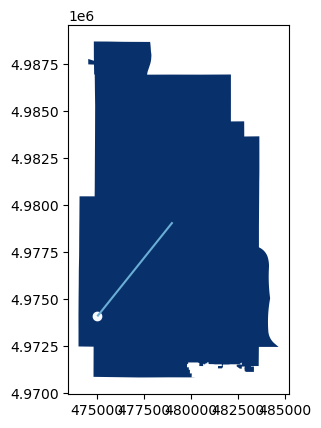

In [5]:
### 5

# Check out the shapes!

shapes.plot(cmap='Blues')

In [6]:
### 6

# Summarize

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   col1      3 non-null      int64   
 1   col2      3 non-null      int64   
 2   geometry  3 non-null      geometry
dtypes: geometry(1), int64(2)
memory usage: 200.0 bytes


In [7]:
### 7

# Save

# Shapefile
# gdf.to_file('shape_shp.shp')

# GeoDataBase
# gdf.to_file("shape_gdf.gdf") # Error can't mix the vector types?

# GeoJSON
# gdf.to_file('shapes_GeoJSON.geojson')


In [8]:
### 8

# To WKT

wkts = [x.wkt for x in shapes]

# Open file in write mode
with open(r'shapes_wkt.txt', 'w') as file:
    for wkt in wkts:
        # write each wkt on new line
        file.write("%s\n" % wkt)

In [77]:
### 9

# Import from wkt

# Open shapes_wkt.txt
with open(r'shapes_wkt.txt', 'r') as file:
    loaded_wkts = file.readlines()
    

wkts = []
# Remove new line characters
for loaded_wkt in loaded_wkts:
    wkts += [loaded_wkt[:-2]]
                 
wkts

['POINT (479025.02799999999 4979084.6960000005',
 'MULTILINESTRING ((479025.02799999999 4979084.6960000005, 475025.02799999999 4974084.6960000005)',
 'MULTIPOLYGON Z (((474025.02780000027 4974084.6956999991 0, 474026.81520000007 4973286.3438000008 0, 474027.36409999989 4972484.2321000006 0, 474829.96729999967 4972473.0042000003 0, 474827.12650000025 4971668.7555999998 0, 474823.79800000042 4970870.5369000006 0, 475925.19859999977 4970855.0585999992 0, 476683.10240000021 4970844.4085000008 0, 477230.17980000004 4970836.7248999998 0, 478039.2703999998 4970839.7566999998 0, 478286.21030000038 4970841.4076000005 0, 478849.89460000023 4970845.1762000006 0, 480189.29530000035 4970840.7016000003 0, 480190.58789999969 4970849.8049999997 0, 480078.14599999972 4970850.3302999996 0, 480038.99600000028 4970850.4730999991 0, 480045.18039999995 4971051.4532999992 0, 479944.37959999964 4971051.7886999995 0, 479948.04629999958 4971243.4615000002 0, 479889.87160000019 4971243.3337999992 0, 479891.37069